In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
# Constants and parameters
C = 1e-9
ΔS = 30
a_i = 0.5
m = 3.0
β = 1.0
π = np.pi

In [ ]:
# Define C2 based on the equations
def C2(C, β, ΔS, π, m):
    return C * (β * ΔS * np.sqrt(π))**m * (2 - m) / m

C2_value = C2(C, β, ΔS, π, m)

In [ ]:
# Number of cycles array
N = np.linspace(0, 250000, 500)

# Crack length function a(N)
def crack_length(N, C2, a_i, m):
    return (a_i**((2-m)/2) + C2 * N)**(2/(2-m))

# Compute crack length for each N
a = crack_length(N, C2_value, a_i, m)

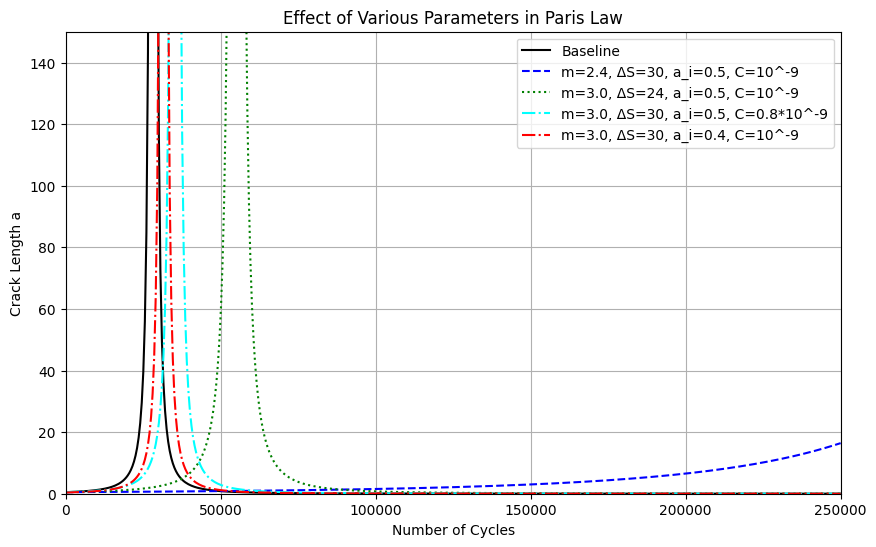

In [ ]:
# Plot the baseline result
plt.figure(figsize=(10, 6))
plt.plot(N, a, label='Baseline', color='black')

# Now we plot the curves with varied parameters
# Decrease m to 2.4
m_varied = 2.4
C2_varied = C2(C, β, ΔS, π, m_varied)
a_varied = crack_length(N, C2_varied, a_i, m_varied)
plt.plot(N, a_varied, label='m=2.4, ΔS=30, a_i=0.5, C=10^-9', linestyle='--', color='blue')

# Reduce ΔS to 24
ΔS_varied = 24
C2_varied = C2(C, β, ΔS_varied, π, m)
a_varied = crack_length(N, C2_varied, a_i, m)
plt.plot(N, a_varied, label='m=3.0, ΔS=24, a_i=0.5, C=10^-9', linestyle=':', color='green')

# Reduce C to 0.8 * 10^-9
C_varied = 0.8e-9
C2_varied = C2(C_varied, β, ΔS, π, m)
a_varied = crack_length(N, C2_varied, a_i, m)
plt.plot(N, a_varied, label='m=3.0, ΔS=30, a_i=0.5, C=0.8*10^-9', linestyle='-.', color='cyan')

# Reduce a_i to 0.4
a_i_varied = 0.4
a_varied = crack_length(N, C2_value, a_i_varied, m)
plt.plot(N, a_varied, label='m=3.0, ΔS=30, a_i=0.4, C=10^-9', linestyle='-.', color='red')

# Plot settings
plt.xlabel('Number of Cycles')
plt.ylabel('Crack Length a')
plt.title('Effect of Various Parameters in Paris Law')
plt.legend()
plt.grid(True)
plt.ylim(0, 150)
plt.xlim(0, 250000)

# Display plot
plt.show()

##Correct Plots by plotting up to the value of N for each parameter set at which the derivative with respect to N is maximum

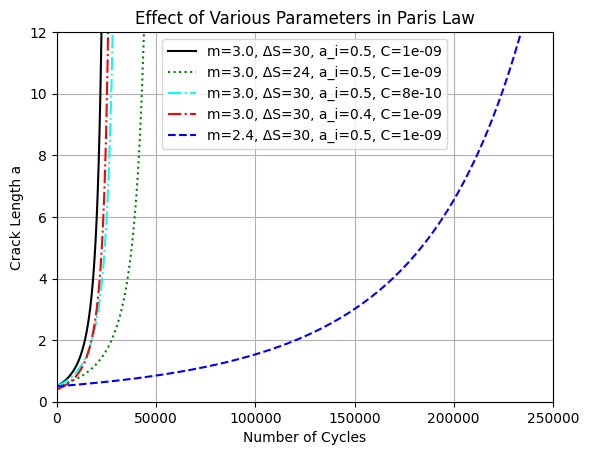

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
β = 1.0
π = np.pi

# Define the function to calculate C2
def C2(C, β, ΔS, π, m):
    return C * (β * ΔS * np.sqrt(π))**m * (2 - m) / m

# Define the crack length function
def crack_length(N, C2_value, a_i, m):
    return (a_i**((2-m)/2) + C2_value * N)**(2/(2-m))

# Generate values for N
N_values = np.linspace(0, 250000, 1000)

# List of parameter sets
parameter_sets = [
    {'m': 3.0, 'ΔS': 30, 'a_i': 0.5, 'C': 1e-9, 'max_N': 28178, 'color': 'black', 'linestyle': '-'},
    {'m': 3.0, 'ΔS': 24, 'a_i': 0.5, 'C': 1e-9, 'max_N': 55055, 'color': 'green', 'linestyle': ':'},
    {'m': 3.0, 'ΔS': 30, 'a_i': 0.5, 'C': 0.8e-9, 'max_N': 35235, 'color': 'cyan', 'linestyle': '-.'},
    {'m': 3.0, 'ΔS': 30, 'a_i': 0.4, 'C': 1e-9, 'max_N': 31531, 'color': 'red', 'linestyle': '-.'},
    {'m': 2.4, 'ΔS': 30, 'a_i': 0.5, 'C': 1e-9, 'max_N': 250000, 'color': 'blue', 'linestyle': '--'}
]

# Plot each parameter set
for params in parameter_sets:
    m = params['m']
    ΔS = params['ΔS']
    a_i = params['a_i']
    C = params['C']
    max_N = params['max_N']
    color = params['color']
    linestyle = params['linestyle']

    # Calculate C2
    C2_value = C2(C, β, ΔS, π, m)

    # Calculate crack length
    a_values = crack_length(N_values, C2_value, a_i, m)

    # Limit N and a values to the specified max_N
    N_limited = N_values[N_values <= max_N]
    a_limited = a_values[:len(N_limited)]

    # Plot the curve
    plt.plot(N_limited, a_limited, label=f'm={m}, ΔS={ΔS}, a_i={a_i}, C={C}', linestyle=linestyle, color=color)

# Plot settings
plt.xlabel('Number of Cycles')
plt.ylabel('Crack Length a')
plt.title('Effect of Various Parameters in Paris Law')
plt.legend()
plt.grid(True)
plt.ylim(0, 12)
plt.xlim(0, 250000)

# Display plot
plt.show()